In [379]:
from pprint import pprint

In [380]:
with open('names.txt','r') as r:
    words = r.read()
    words = words.splitlines()

In [381]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [382]:
len(words)

32033

In [383]:
max(len(w) for w in words)

15

In [384]:
l = [1,2,3,4,5,6]
name = ['Harsh','Malik','Good','man']
for _ in zip(l,name):
    print(_)

(1, 'Harsh')
(2, 'Malik')
(3, 'Good')
(4, 'man')


In [385]:
b = {}
for n in words:
    chs = ['<S>'] + list(n) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [386]:
sorted(b.items(),key= lambda kv: -kv[1] )

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [387]:
import torch

In [388]:
n = torch.zeros((27,27),dtype=torch.int32)

In [389]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [390]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        n[ix1,ix2] +=1

In [391]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

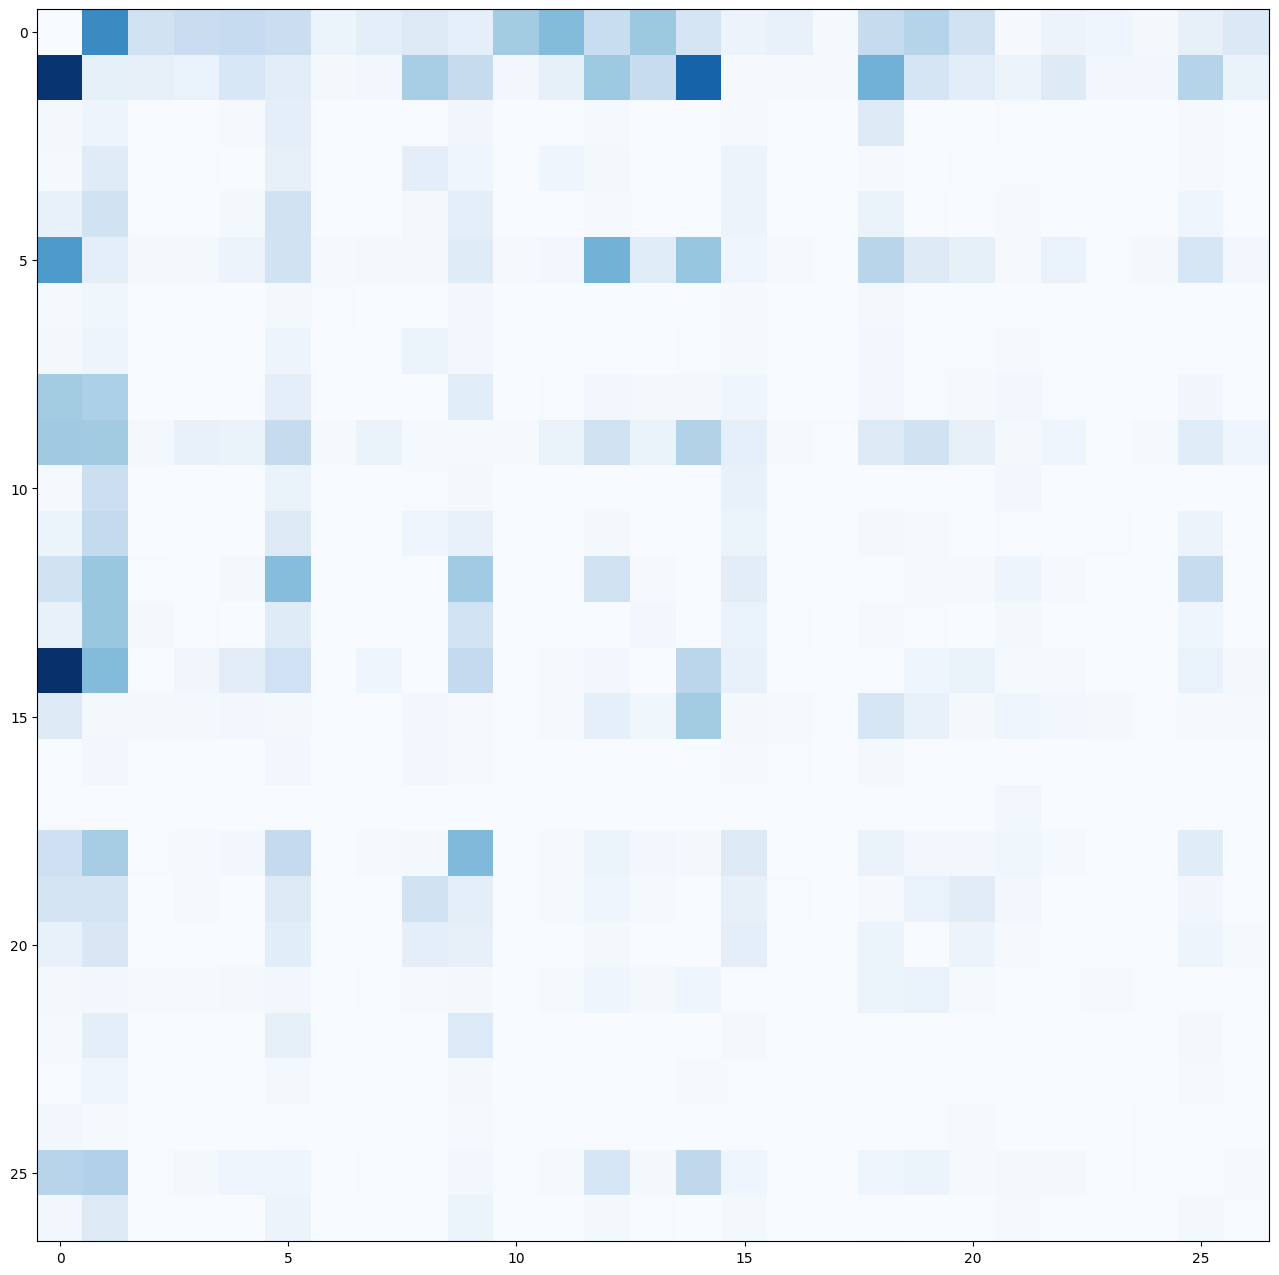

In [392]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(n,cmap='Blues')

for i in range(28):
    for j in range(28):
        pass

plt.show()

In [393]:
P = n.float()
P /= P.sum(1,keepdim=True)
P.shape

torch.Size([27, 27])

In [394]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    ix = 0

    out = []

    while True:
        '''
        we convert each row into a probability matrix, and then do multinomial sampling from it, wherein each sample
        is a index of the invidiual item in the original row, which is most likely
        ''' 
        p = P[ix]

        # p = n[ix].float()
        # p = p/sum(p)

        # p = torch.ones(27)/27.0 if we use a random model wherein everything is equally likely, we get a much worse model

        ix = int(torch.multinomial(p,num_samples=1,replacement=True,generator=g).item())
        out.append(itos[ix])
        if ix==0:
            break

    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [395]:
log_like = 0.0
n  = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_like+=logprob
        n+=1
        print(f'{ch1} {ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_like=}')
print(f'{-log_like}')
print(f'{-log_like/n}')

. e: 0.0478 -3.0408
e m: 0.0377 -3.2793
m m: 0.0253 -3.6772
m a: 0.3899 -0.9418
a .: 0.1960 -1.6299
. o: 0.0123 -4.3982
o l: 0.0780 -2.5508
l i: 0.1777 -1.7278
i v: 0.0152 -4.1867
v i: 0.3541 -1.0383
i a: 0.1381 -1.9796
a .: 0.1960 -1.6299
. a: 0.1377 -1.9829
a v: 0.0246 -3.7045
v a: 0.2495 -1.3882
a .: 0.1960 -1.6299
. i: 0.0184 -3.9927
i s: 0.0743 -2.5990
s a: 0.1482 -1.9094
a b: 0.0160 -4.1373
b e: 0.2476 -1.3958
e l: 0.1590 -1.8386
l l: 0.0964 -2.3397
l a: 0.1879 -1.6717
a .: 0.1960 -1.6299
. s: 0.0642 -2.7465
s o: 0.0655 -2.7256
o p: 0.0120 -4.4250
p h: 0.1988 -1.6153
h i: 0.0957 -2.3463
i a: 0.1381 -1.9796
a .: 0.1960 -1.6299
. c: 0.0481 -3.0337
c h: 0.1880 -1.6713
h a: 0.2946 -1.2220
a r: 0.0963 -2.3400
r l: 0.0325 -3.4259
l o: 0.0496 -3.0042
o t: 0.0149 -4.2082
t t: 0.0671 -2.7009
t e: 0.1285 -2.0515
e .: 0.1950 -1.6346
. m: 0.0792 -2.5354
m i: 0.1891 -1.6655
i a: 0.1381 -1.9796
a .: 0.1960 -1.6299
. a: 0.1377 -1.9829
a m: 0.0482 -3.0319
m e: 0.1232 -2.0943
e l: 0.1590 -1.8386


In [396]:
xs,ys = [],[]
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [397]:
xs.shape

torch.Size([228146])

In [398]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()
yenc = F.one_hot(ys,num_classes=27).float()

In [399]:
xenc.shape

torch.Size([228146, 27])

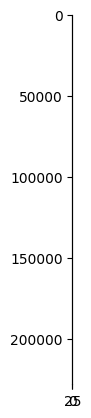

In [400]:
plt.imshow(xenc)
plt.show()

In [401]:
# for now we've just created a single neuron, that takes in 27 values for each of these 5 inputs
w = torch.randn((27,1))
print(w)
xenc @ w
# (5, 27) @ (27, 1) = (5, 1)

tensor([[ 1.5312],
        [-0.3657],
        [-1.0654],
        [-1.5623],
        [ 0.8268],
        [ 0.4910],
        [-1.3179],
        [-0.3397],
        [-0.0494],
        [-1.3806],
        [ 0.9261],
        [-1.5579],
        [ 1.3180],
        [ 0.4458],
        [ 0.8153],
        [ 0.1457],
        [-0.5939],
        [ 0.9547],
        [-0.1922],
        [-0.8103],
        [ 0.1913],
        [ 0.2961],
        [-0.6836],
        [-0.6428],
        [ 0.0270],
        [ 0.9385],
        [-0.5259]])


tensor([[ 1.5312],
        [ 0.4910],
        [ 0.4458],
        ...,
        [ 0.9385],
        [-0.5259],
        [ 0.0270]])

In [406]:
g = torch.Generator().manual_seed(2147483647)
# But we can go crazy and have 27 neurons that correspond to those 27 one hots for those 5 values
w = torch.randn((27,27),generator=g)
logits = (xenc @ w)
# (5, 27) @ (27, 27) = (5, 27)
logits.shape

torch.Size([228146, 27])

In [407]:
log_counts= logits.exp()
probs = log_counts/log_counts.sum(1,keepdim=True)
probs.shape

torch.Size([228146, 27])

In [404]:
probs[0].sum()

tensor(1.0000)

In [405]:
loss = -probs[torch.arange(5),ys].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [5], [228146]

# From here on out, we tighten things up:
1. Initiation of weights
2. Forward pass
3. Calculating loss
4. Backward pass and updating weights

In [ ]:
# initiating our weights
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27,27),generator=g,requires_grad=True)

In [ ]:
# forward pass
logits = (xenc @ w)
counts = logits.exp()
probs = counts/counts.sum(1,keepdim=True)

# loss
loss = -probs[torch.arange(5),ys].log().mean()
loss

tensor(3.5694, grad_fn=<NegBackward0>)

In [ ]:
logits.shape

torch.Size([1, 27])

In [ ]:
# backward pass
w.grad = None
loss.backward()

In [ ]:
w.grad

tensor([[ 0.0122,  0.0020,  0.0025,  0.0009,  0.0034, -0.1969,  0.0005,  0.0047,
          0.0028,  0.0063,  0.0016,  0.0056,  0.0019,  0.0017,  0.0101,  0.0463,
          0.0122,  0.0005,  0.0051,  0.0011,  0.0069,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0304,  0.0289],
        [-0.1963,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0214,  0.0026,
          0.0025,  0.0010,  0.0203,  0.0017,  0.0196,  0.0022,  0.0047,  0.0042,
          0.0082,  0.0016,  0.0178,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0130,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [ ]:
# grad descent and updating w
w.data += -1 * w.grad

In [ ]:
loss

tensor(3.5694, grad_fn=<NegBackward0>)

In [ ]:
# initiating our weights
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27,27),generator=g,requires_grad=True)

In [ ]:
from tqdm import trange
for n in trange(100,desc='Running gradient descent with 100 steps',colour='green'):
    # time to do grad descent 20 times
    # forward pass
    logits = (xenc @ w)
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdim=True)

    # loss
    loss = -probs[torch.arange(len(ys)),ys].log().mean()

    # backward pass
    w.grad = None
    loss.backward()

    # grad descent and updating w
    w.data += -(50 * w.grad)

    n+=1

print(f'Negative_Log_Likelihood_loss after {n} runs is: {loss:.4f}')

Running gradient descent with 100 steps: 100%|██████████| 100/100 [00:02<00:00, 42.36it/s]

Negative_Log_Likelihood_loss after 100 runs is: 2.4624


In [ ]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(5):
    ix = 0

    out = []

    while True:
        '''
        we convert each row into a probability matrix, and then do multinomial sampling from it, wherein each sample
        is a index of the invidiual item in the original row, which is most likely
        ''' 
        # p = P[ix]

        # sampling using neural network approach
        # ----------------------
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = xenc @ w
        counts = logits.exp()
        p = counts / counts.sum(1,keepdim=True)
        # ----------------------

        ix = int(torch.multinomial(p,num_samples=1,replacement=True,generator=g).item())
        out.append(itos[ix])
        if ix==0:
            break

    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
